In [1]:
from environment import Environment
from collections import defaultdict
import pandas as pd
import os

In [2]:
N = 500 # number of simulations

samples = defaultdict(list)
csv_path = "samples.csv"

# if CSV exists, read it
if os.path.exists(csv_path):
    df_existing = pd.read_csv(csv_path)
    samples = defaultdict(list, df_existing.to_dict(orient="list"))
else:
    samples = defaultdict(list)

for i in range(N):
    print(i)
    temp = Environment()
    print(temp.samples.features)

    # add feature dict values
    for key, value in temp.samples.features.items():
        if key not in ("season", "geometry"):
            samples[key].append(value)

    # add derived dict values
    for key, value in temp.derived.items():
        samples[key].append(value)

    # add impact value
    samples["impact"].append(temp.impact)

df = pd.DataFrame(samples)
df.to_csv("samples.csv", index=False)


0
{'season': 'Winter', 'household': 0.21021016424773686, 'home_insure_rate': 0.7459321618346263, 'income_norm': 0.4194743593912636, 'deprived': 0.79, 'low_income': 0.42, 'disabled': 0.18370869290662825, 'general_health': 0.8142348816228449, 'elderly': 0.15852919037605623, 'children': 0.20347209438641448, 'precipitation': 2.143360530314898, 'river_level': 0.02962788171632689, 'urban': 1, 'population_density_ratio': 1.1718250414453872, 'property_value': 139017.1987703324, 'property_value_norm': 0.20392571667142206, 'building_age': 175, 'building_age_ratio': 2.184756339266849, 'holiday': 0, 'water_dens': 1.731188963805426, 'water_dens_ratio': 2.081151557878959, 'water_dist': 183.15549844013108, 'water_dist_ratio': 2.7156003426920923, 'elevation': 17.5200072580813, 'elevation_ratio': 6.489076588873814, 'impervious': 0.027312410755159118, 'impervious_ratio': 0.0615373149273788, 'historic': 0, 'road_dens': 3.6644391335874267, 'road_dens_ratio': 0.3724473614660497, 'road_dist': 2.009891429555

In [3]:
summary = df.describe()
summary.to_csv("samples_describe.csv")

In [20]:
print(len(samples.keys()))

49


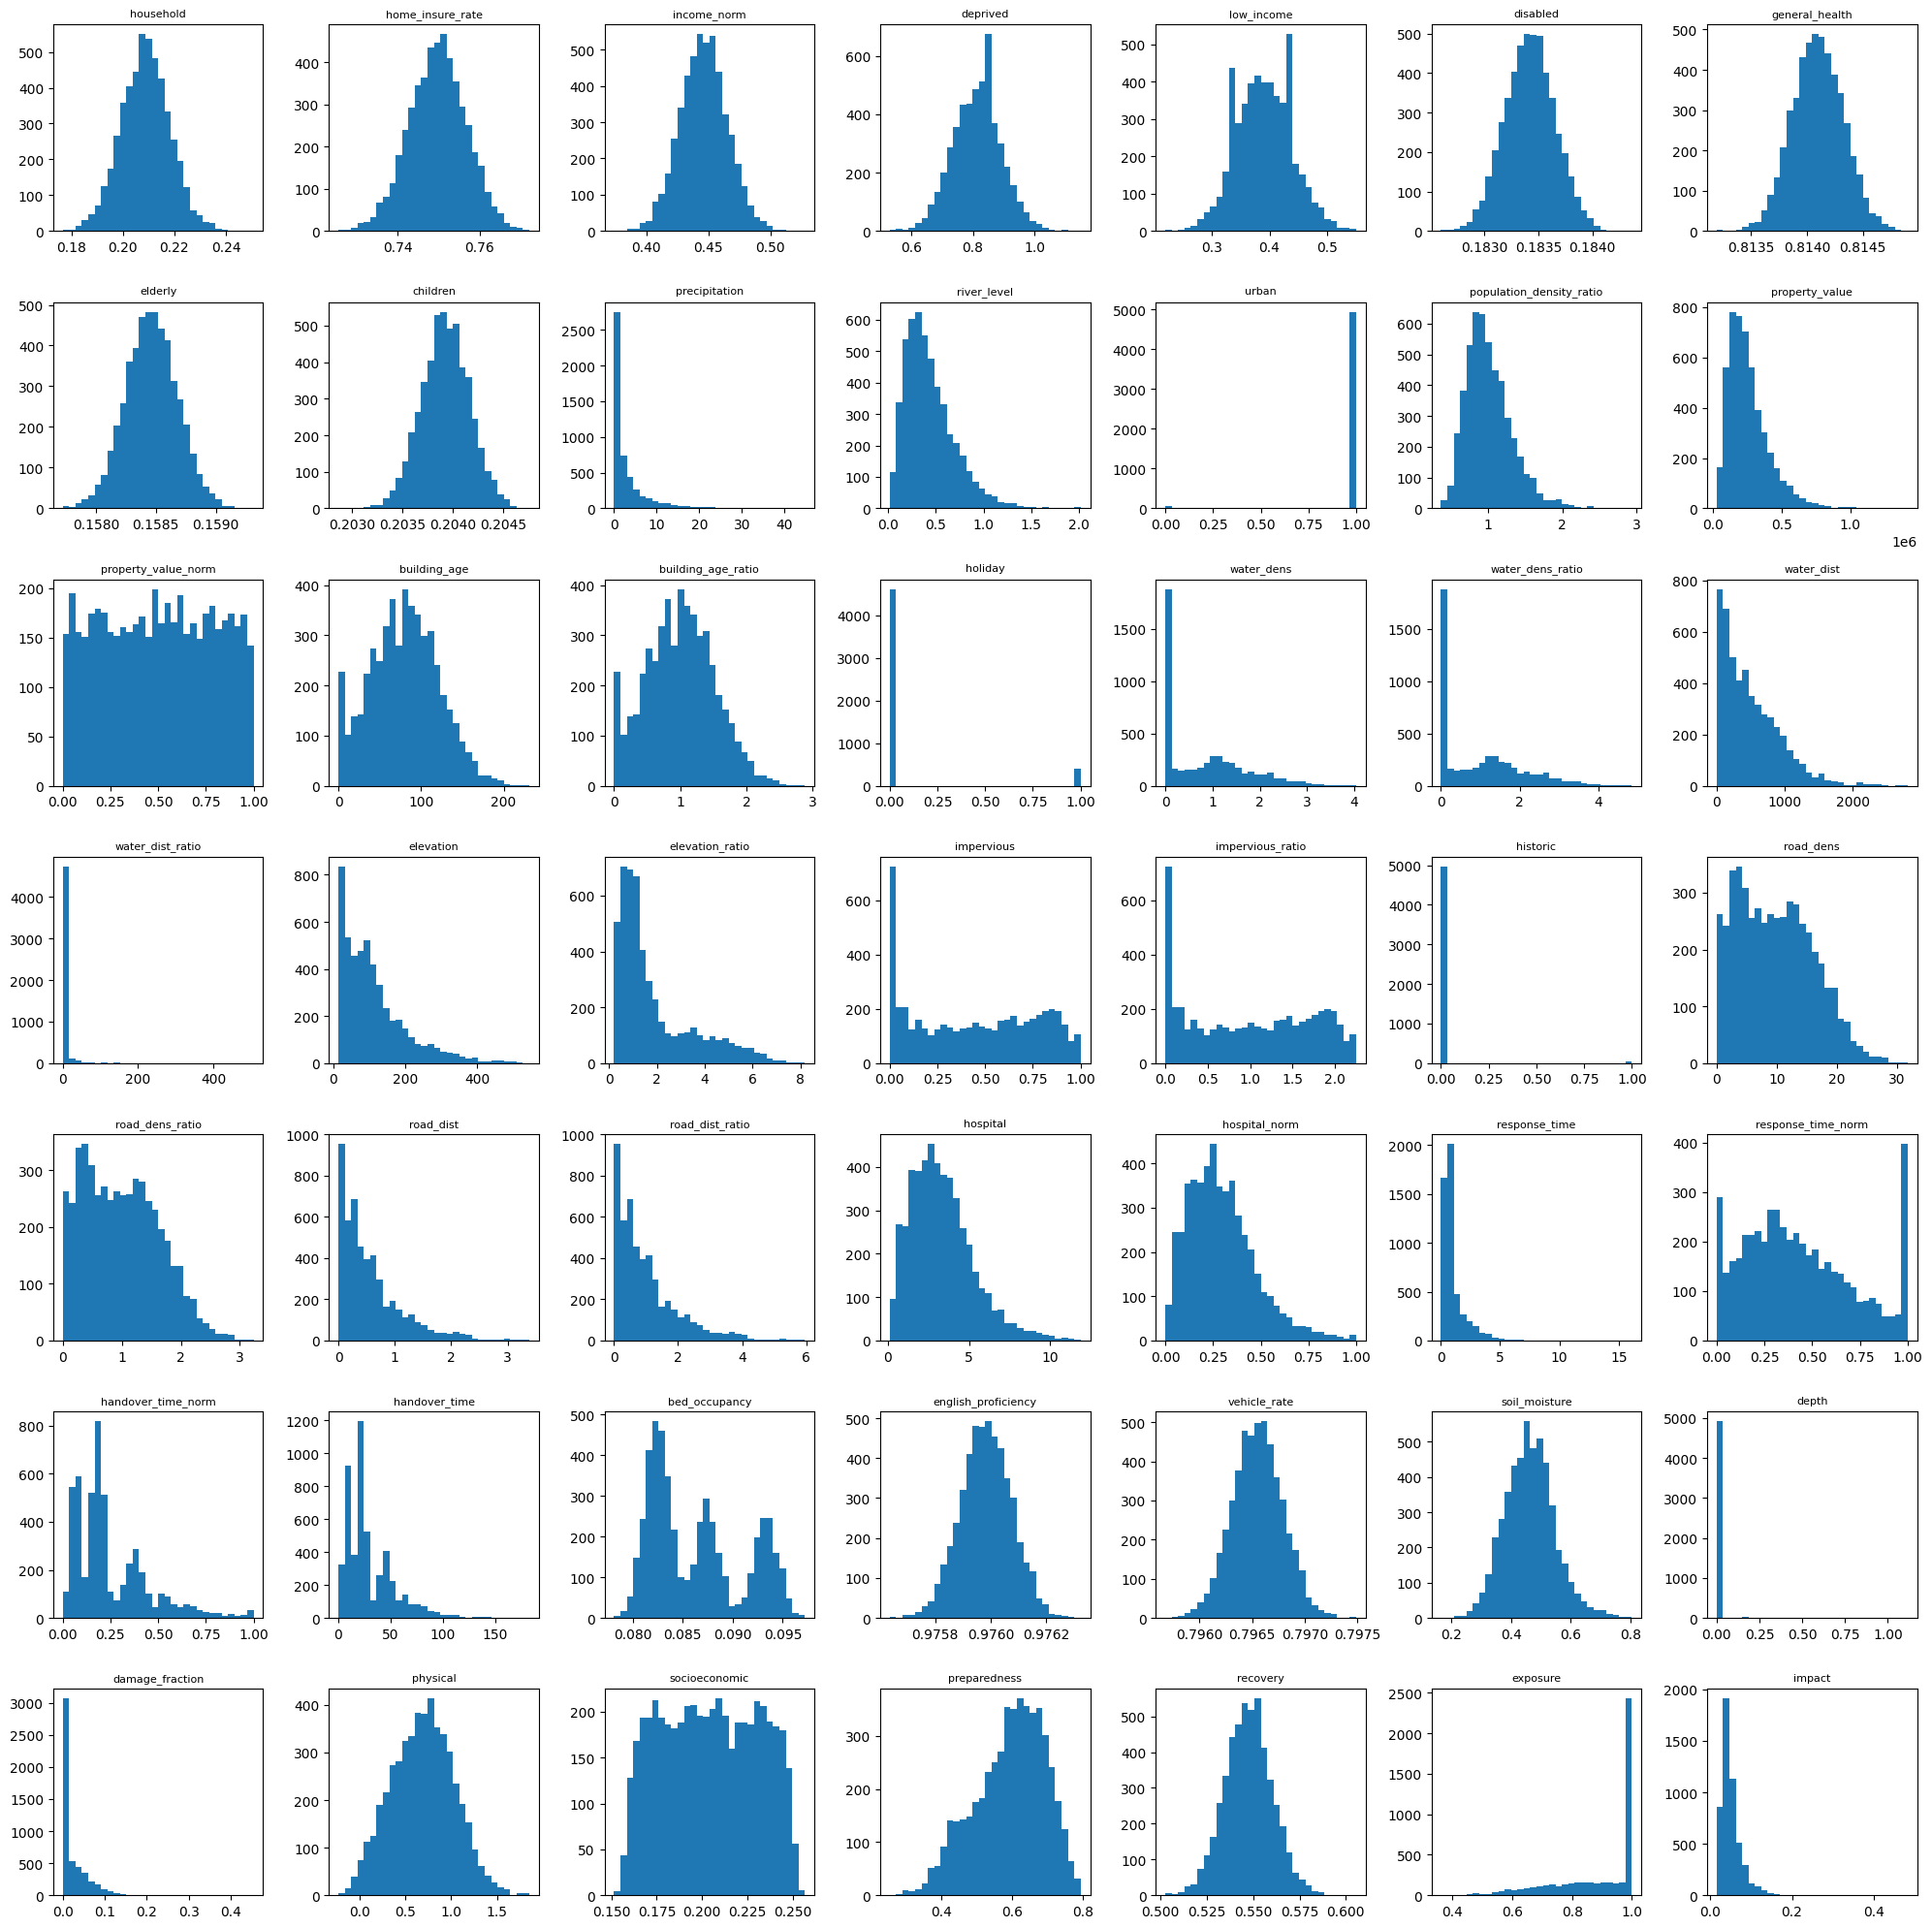

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# load samples
df = pd.read_csv("samples.csv")

# create 7x7 histogram subplots
fig, axes = plt.subplots(7, 7, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, df.columns):
    ax.hist(df[col].dropna(), bins=30)
    ax.set_title(col, fontsize=8)

# hide unused axes if fewer than 49 columns
for ax in axes[len(df.columns):]:
    ax.axis("off")

plt.tight_layout()
plt.show()